In [1]:
import sys, os, pandas
import uproot
import numpy as np
# import HDFStore
import matplotlib.pyplot as plt

In [2]:
filename = "/scratch/mmarcheg/lumi_data/clusters_V1_Run2017C_Fill6061.root"
#plot_dir = "../ntuplesPixel/plots/" + (filename.split("/")[-1]).split(".")[-2] + "/"
#os.mkdir(plot_dir)
print("Opening %s" % filename)
file = uproot.open(filename)

Opening /scratch/mmarcheg/lumi_data/clusters_V1_Run2017C_Fill6061.root


In [3]:
tree = file[b'a/tree;1']
print(str(tree.name) + " contains " + str(len(tree)) + " entries")

b'tree' contains 278887529 entries


In [14]:
entrystop = 53605236
read_entries = 0
#df_list = []
instaLumi = np.array([])
N = len(tree)
df_grid =tree.pandas.df([b'instaLumi', b'bx', b'orbit'], entrystop=entrystop)

In [15]:
df_grid.head()

,instaLumi,bx,orbit
0,16524.0,1572,22245640
1,16524.0,1572,22245640
2,16524.0,1572,22245640
3,16524.0,1572,22245640
4,16524.0,1572,22245640


In [16]:
df_grid.drop_duplicates(subset=None, keep='first', inplace=True)
df_grid.head()

,instaLumi,bx,orbit
0,16524.0,1572,22245640
3469,16524.0,56,22261652
7380,16524.0,3315,22238407
11588,16524.0,2753,22268763
15875,16524.0,2288,22262092


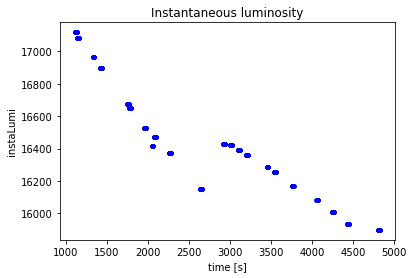

In [33]:
plt.scatter(0.0000889*df_grid['orbit'], df_grid['instaLumi'], marker='.', color='blue')
plt.xlabel('time [s]')
plt.ylabel('instaLumi [$10^{30} cm^{-2} s$]')
plt.title('Instantaneous luminosity')
plt.show()

In [36]:
nbins=10
lumi_bins = np.quantile(instaLumi, np.linspace(0, 1, nbins+1))
print(lumi_bins)

[ 9010.   9887.6 10683.  11441.6 12306.2 13256.7 14133.6 15011.4 15746.8
 16369.7 17117. ]


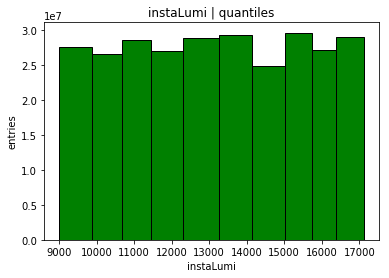

In [38]:
plt.hist(instaLumi, bins=lumi_bins, facecolor='green', ec='black')
plt.xlabel('instaLumi')
plt.ylabel('entries')
plt.title('instaLumi | quantiles')
plt.show()